# Diabetes Risk Prediction — EDA, Preprocessing, and Baseline Models
## Author: Mohamed Makki  
#### Date &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Oct 25th, 2025   
#### Project &nbsp;&nbsp;&nbsp;&nbsp;: diabetes-risk-xai 
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; MIT ELO2 Capstone Project 

## 1. Importing and loading

In [28]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# load dataset (pima.csv)
df = pd.read_csv("../../../data/pima.csv")

In [30]:
# display the first five rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Quick data overview

In [31]:
# Quick data overview, info & summaries
print("Shape:", df.shape)            # number of rows and columns.
print()
display(df.info())                   # data types and non-null counts. 
print()
display(df.describe().T)             # descriptive statistics for numerical columns
print()
print("Missing counts    (raw):")    # print a title "missing counts   (raw)"
print("........................")
print(df.isna().sum())               # number of missing values
print()
duplicated_counts = df.duplicated().sum()
print("Duplicated Counts = ", duplicated_counts)

Shape: (768, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



Missing counts    (raw):
........................
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

Duplicated Counts =  0


In [32]:
# Count zeros in each column
zero_counts = (df == 0).sum()

# Display results
print("Zero values per column:\n")
print(zero_counts)


Zero values per column:

Pregnancies         111
Glucose               5
BloodPressure        35
SkinThickness       227
Insulin             374
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome             500
dtype: int64


## 3. Data Visualization for EDA

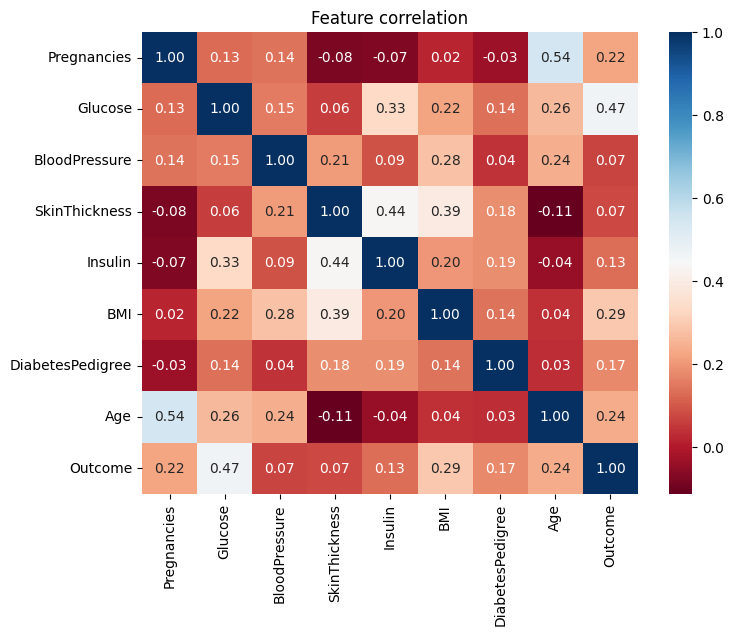

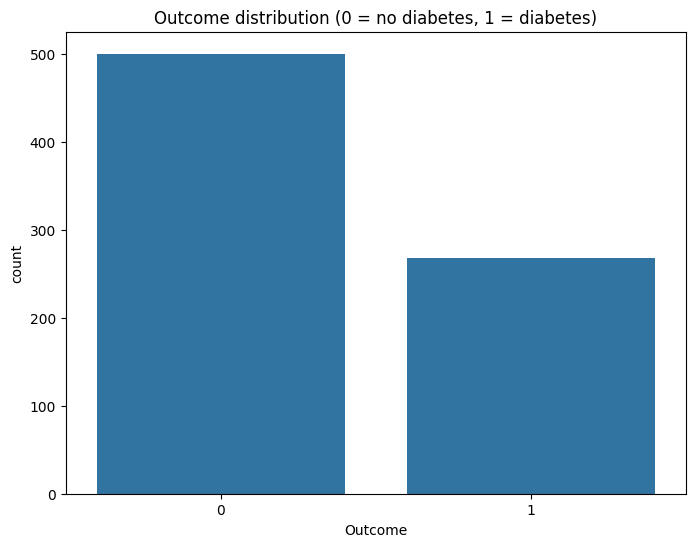

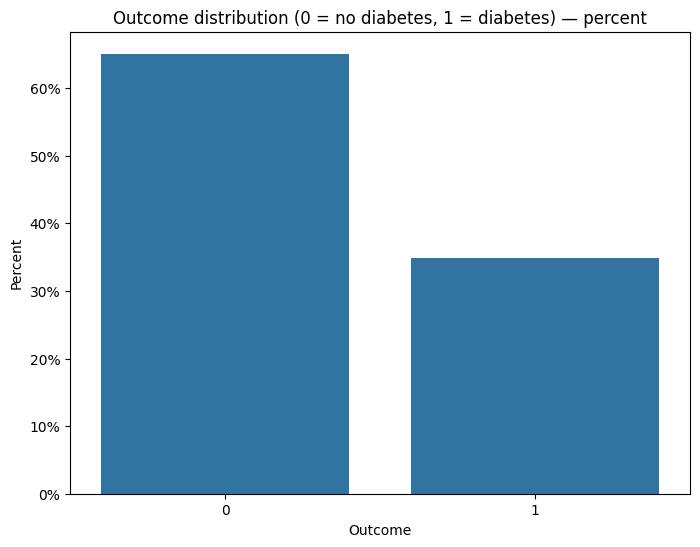

In [33]:
# Visual EDA
# correlation heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="RdBu")
plt.title("Feature correlation")
plt.show()

# Outcome distribution counts
plt.figure(figsize=(8,6))
sns.countplot(x="Outcome", data=df)
plt.title("Outcome distribution (0 = no diabetes, 1 = diabetes)")
plt.show()

# Outcome distribution percentage
plt.figure(figsize=(8,6))
sns.countplot(x="Outcome", data=df, stat="percent")  # stat="percent" or "proportion"
plt.title("Outcome distribution (0 = no diabetes, 1 = diabetes) — percent")
plt.ylabel("Percent")
plt.gca().yaxis.set_major_formatter(lambda x, pos: f"{x:.0f}%")
plt.show()

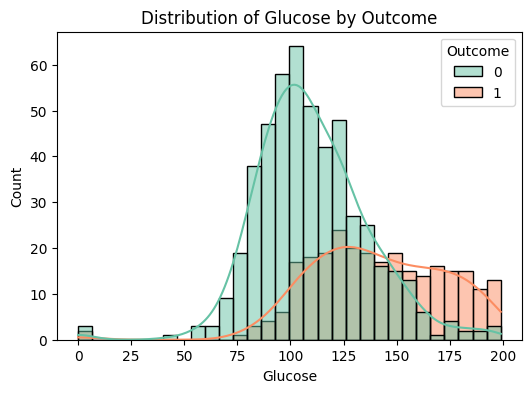

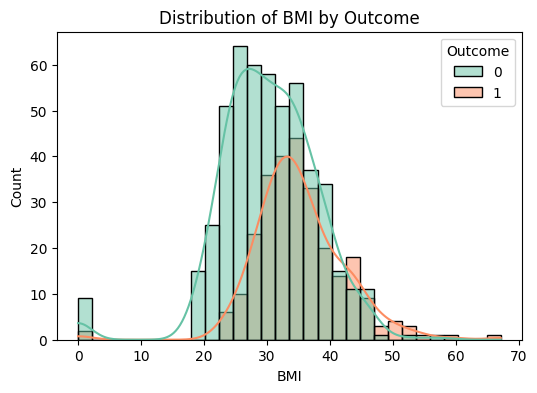

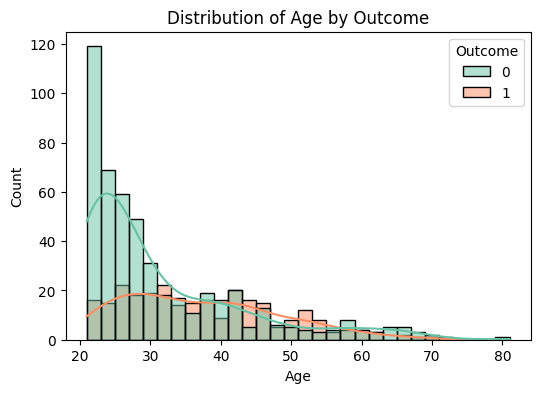

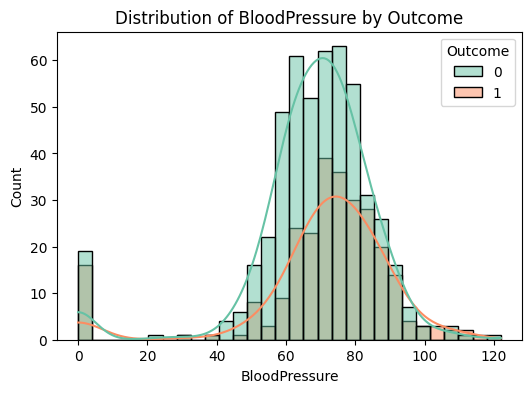

In [34]:
# show 
features = ["Glucose", "BMI", "Age", "BloodPressure"]
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Outcome", kde=True, palette="Set2", bins=30)
    plt.title(f"Distribution of {col} by Outcome")
    plt.show()

## 4. Data Cleaning & Preprocessing

In [35]:
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
# Copy dataframe to avoid accidental change
data = df.copy()

In [37]:
# Columns where 0 is not a realistic measurement (treat as missing)
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [38]:
# replace exact zeros with NaN
for col in cols_with_zero_invalid:
    # replace exact zeros with NaN
    data[col] = data[col].replace(0, np.nan)
    # impute with median
    median_val = data[col].median()
    data[col] = data[col].fillna(median_val)

In [39]:
# Verify no missing remain
print("Missing after imputation:")
print(data.isna().sum())

Missing after imputation:
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64


In [40]:
# Features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [42]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape: (614, 8)
X_test shape : (154, 8)


## 5. Baseline Model Training

In [43]:
# baseline logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC :", roc_auc_score(y_test, y_prob))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7077922077922078
ROC AUC : 0.812962962962963

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion matrix:
 [[82 18]
 [27 27]]


## 6. Save preprocessing objects & baseline model

In [44]:
import joblib
import os
os.makedirs("../models", exist_ok=True)

joblib.dump(scaler, "../models/scaler.joblib")
joblib.dump(clf, "../models/logreg_baseline.joblib")
print("Saved scaler and baseline model in ../models/")

Saved scaler and baseline model in ../models/


## 7. Random Forest Classifier

In [45]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:,1]

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC :", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7467532467532467
ROC AUC : 0.8237037037037037

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       100
           1       0.61      0.76      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.75      0.75       154


Confusion Matrix:
 [[74 26]
 [13 41]]


## 8. XGBoost Classifier

In [46]:
# XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:,1]

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC :", roc_auc_score(y_test, y_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.7467532467532467
ROC AUC : 0.8281481481481482

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


Confusion Matrix:
 [[82 18]
 [21 33]]


## 9. Save the Final Model (XGBoost Model)

In [47]:
# Save the final XGBoost model
import joblib
joblib.dump(xgb_model, "../models/xgb_final_model.joblib")
print("✅ Final XGBoost model saved in ../models/")

✅ Final XGBoost model saved in ../models/
